In [131]:
#Import dependencies
from citipy import citipy
import random
import requests as req
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
#the constant part of url
url='http://api.openweathermap.org/data/2.5/weather?'

#my api key
api='8fcce71da62f06f81dd7b4ec5318540d'

#define a bunch of lists to store information

#to store non-redundant city names and country_code from by using citipy
city_list=[]

#to store weather information from API response
lat=[]
temp=[]
wind=[]
cloud=[]
humidity=[]
name=[]
city_id=[]

#set up a counter
count=0

#write a log file
with open('log.txt','a') as txt:
    
    #I would like to access ~600 cities
    while count<600:
        #randomly choose x,y as latitude and longtitude from a range (-90,90) and (-180,180)
        x,y=random.uniform(-90,90),random.uniform(-180,180)
        
        #use x,y to identifiy citipy.nearest_city and assign it to a variable nearest_city
        nearest_city=citipy.nearest_city(x,y)
        
        #get non-redundant cities by using an if statement
        if (nearest_city.city_name,nearest_city.country_code) not in city_list: 
            
            #append only city that has not been in city_list
            city_list.append((nearest_city.city_name,nearest_city.country_code))
            
            #build up a query new city
            query=url+'APPID='+api+'&units=metric&'+'q='+nearest_city.city_name+','+nearest_city.country_code
            
            #make API call and load as json file
            response=req.get(query).json()
            
            #some cities are not included in the openweather API and I tried it will return a dictionary like this 
            #{'cod': '404', 'message': 'city not found'} exclude these ones from recording
            if response!={'cod': '404', 'message': 'city not found'}:
                #get latitude
                lat.append(response.get('coord').get('lat')) 
                #get temp
                temp.append(response.get('main').get('temp')) 
                #Humidity (%)
                humidity.append(response.get('main').get('humidity'))
                #Wind Speed (mph) 
                wind.append(response.get('wind').get('speed'))
                #Cloudiness (%) 
                cloud.append(response.get('clouds').get('all'))
                #get city name just as a confirmation
                name.append(response.get('name'))
                #get city id again as a confirmation
                city_id.append(response.get('id'))
                #count one recorded ones 
                count+=1
                #append a line of record on the log.txt file
                txt.write('Processing record of {} | {} \n {}\n'.format(count,name[-1],query))

In [130]:
#make a dataframe
city_data_df=pd.DataFrame({'City':name,'Temperature':temp,'Wind Speed':wind,'Cloudness':cloud,'Humidity':humidity,'Latitude':lat})
city_data_df.head()

,City,Cloudness,Humidity,Latitude,Temperature,Wind Speed
0,Kruisfontein,88,83,-34.00,18.54,2.52
1,Domoni,48,100,-12.26,27.36,2.12
2,Alta Floresta,68,96,-9.87,23.04,1.32
3,Pitsunda,90,81,43.16,7.00,2.00
4,Port Elizabeth,0,82,-33.92,19.00,4.60


Text(0,0.5,'Temperature Celsius')

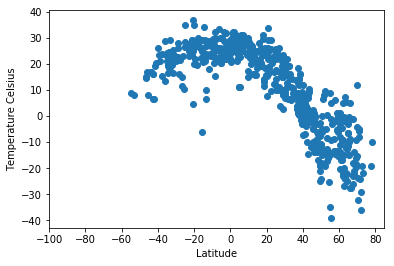

In [141]:

plt.scatter(city_data_df['Latitude'],city_data_df['Temperature'])
plt.xticks(range(-100,100,20))
plt.xlabel('Latitude')
plt.ylabel('Temperature Celsius')